In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
subject_dict= {'A': 'Manuals', 'B': 'Italian Art', 'C': 'Italian Artists', 'D': 'Rome','E':'Italian Topography', 'F': 'Italian Topography', 'G': 'Sources', 'H': 'Iconography', 
               'J': 'Ornament','K': 'Kat and K', 'L': 'Congress Publications', 'M': 'Art in General', 'N': 'Architecture', 'O':'Sculpture', 'P': 'Painting', 'Q': 'Manuscript Illumination', 'R': 'Graphic Arts', 
               'S': 'Applied Arts', 'T': 'Collecting Art etc.', 'U': 'Registers of Artistic Monuments', 'V': 'Cultural Institutions', 'W': 'Non-Italian Artists','X': 'European Topography', 'Y': 'World Topography', 'Z': 'Related Disciplines', ' ': 'None'}

# Currently readable signatures

In [3]:
df = pd.read_csv('data/csv/freihand_signatures.csv')

In [4]:
df.isna().sum()

bvb                    0
title                  0
signature              0
inventory_nr       95088
inventory_date         0
inventory_year     96444
lang               91450
year                   0
sys                    0
text                   0
text_1                 0
text_2                53
text_3            121018
sig_lev_1              0
sig_lev_2              0
dtype: int64

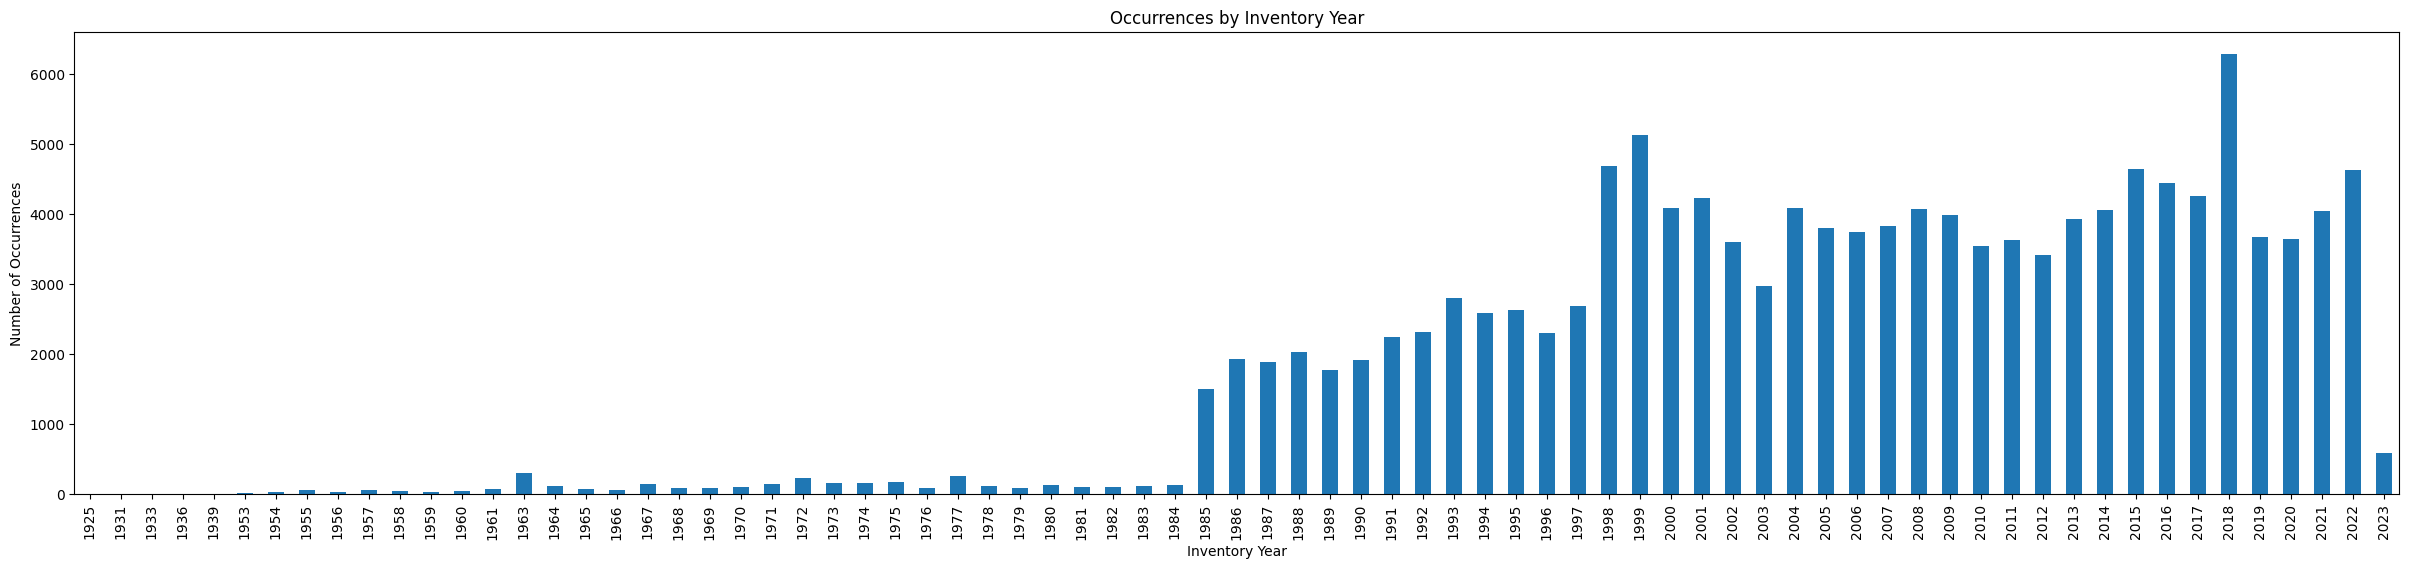

In [5]:
# Group the DataFrame by inventory year and count the occurrences


year_counts = df.groupby('inventory_year').size()

# Plot the year_counts as a bar plot

# Convert the index of the year_counts to integer type
year_counts.index = year_counts.index.astype(int)

year_counts.plot(kind='bar', figsize=(30, 6))
plt.xlabel('Inventory Year')

plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year')
plt.show()

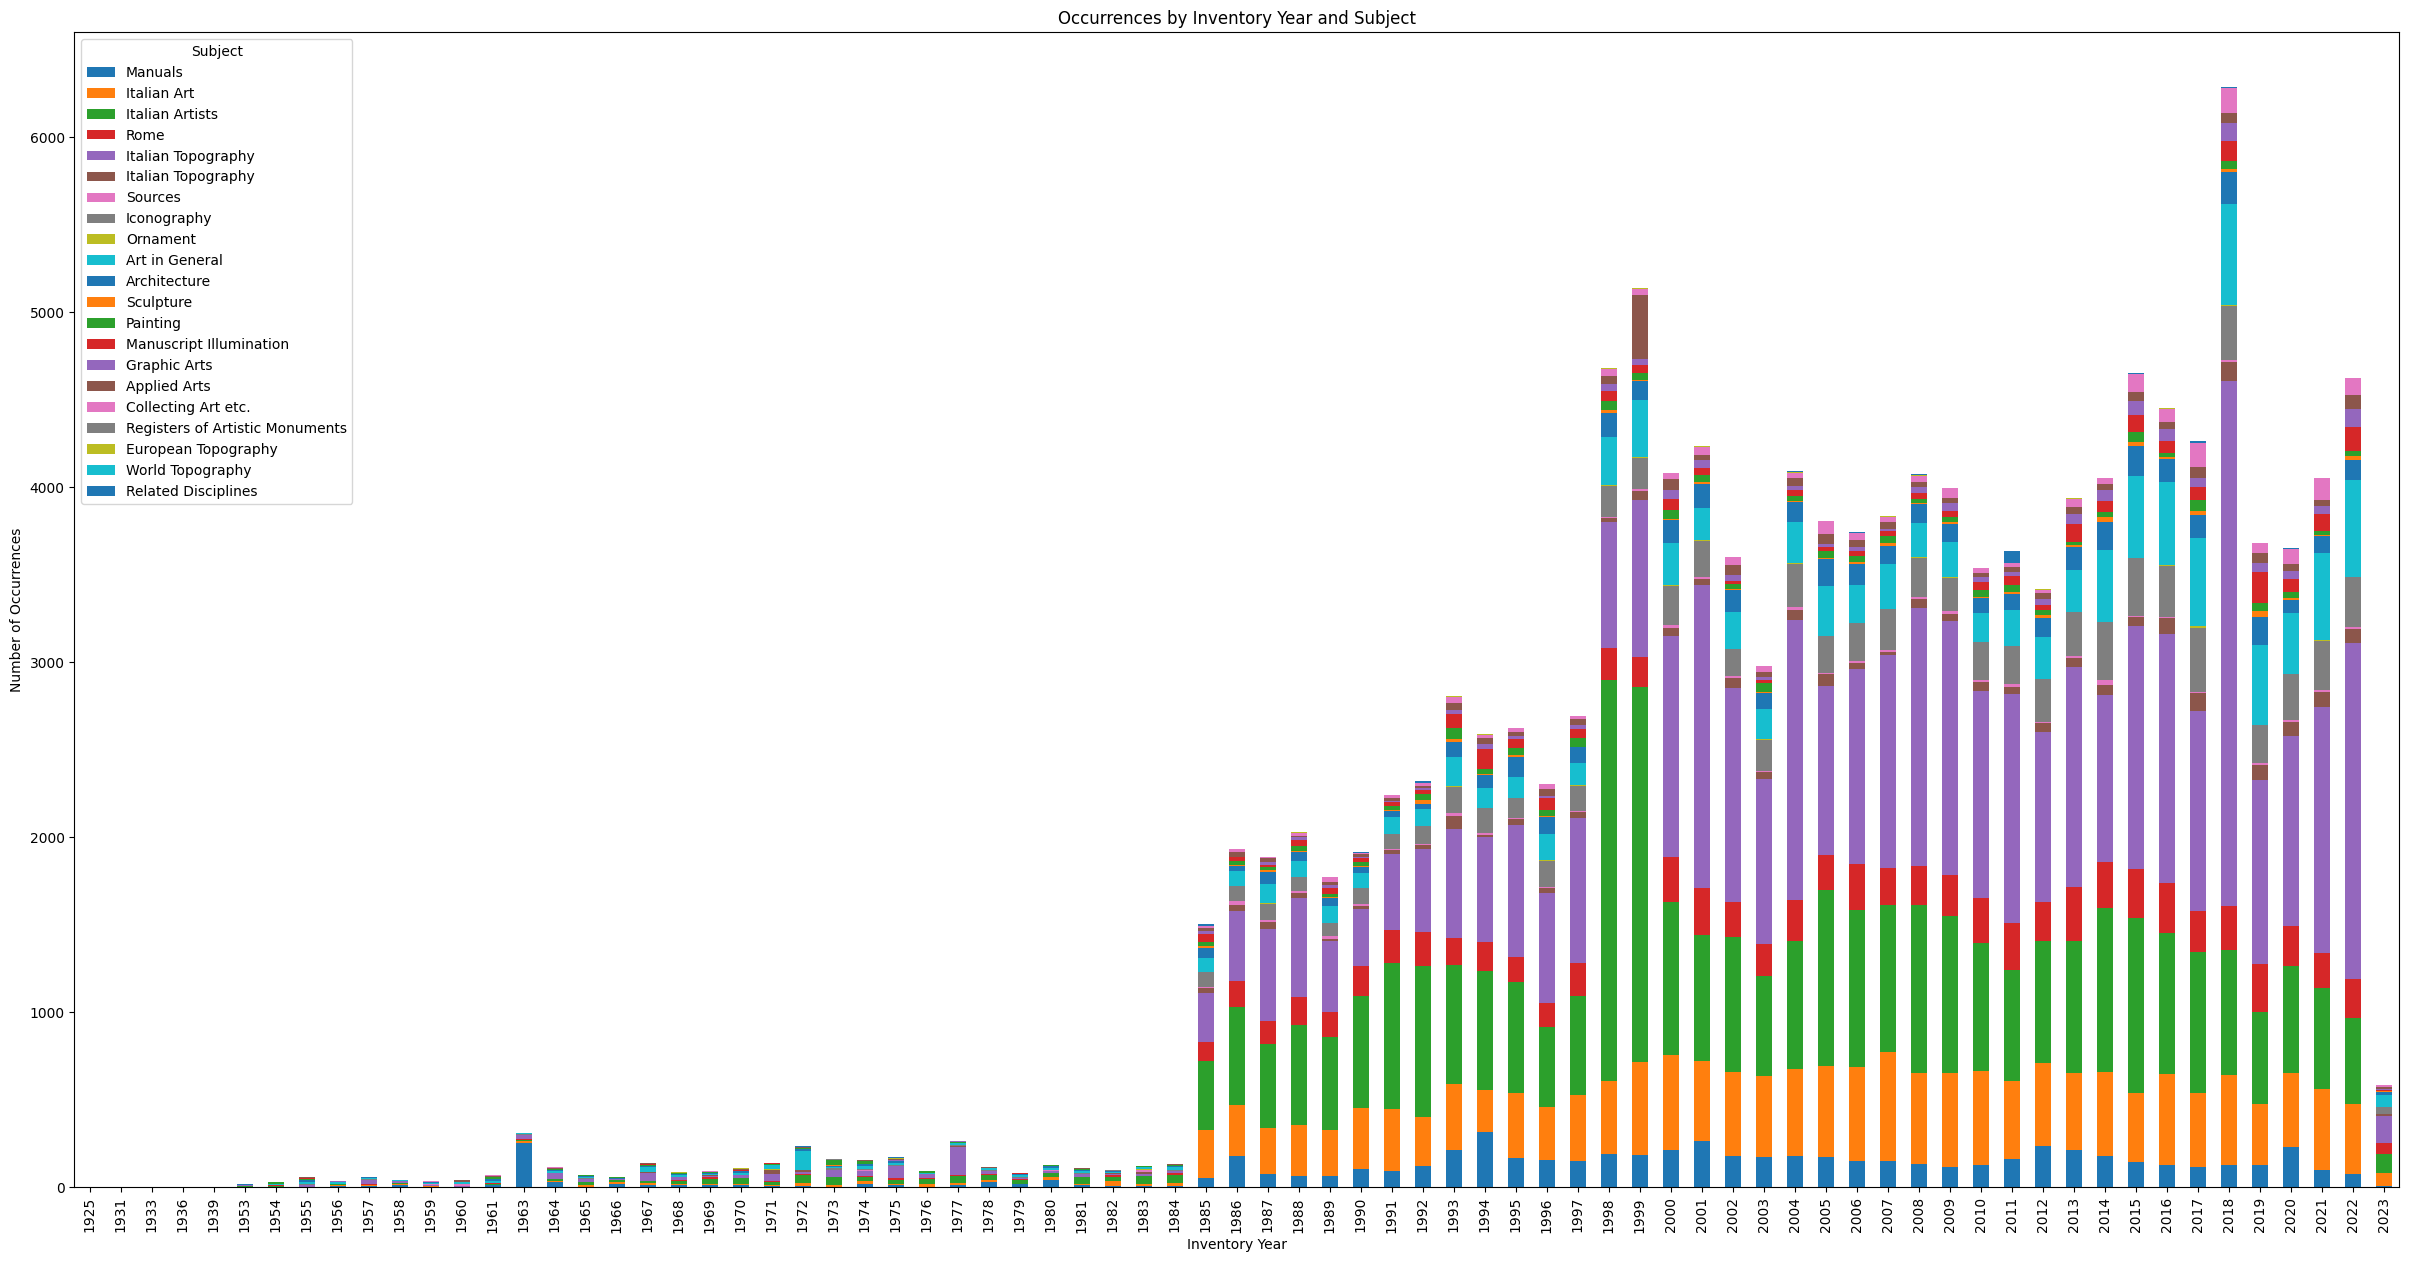

In [6]:

# Group the DataFrame by inventory year and category and count the occurrences
df['Level1'] = df.signature.str[0]
year_counts = df.groupby(['inventory_year', 'Level1']).size().unstack()

# Plot the year_counts as a bar plot
ax = year_counts.plot(kind='bar', stacked=True, figsize=(30, 15))
plt.xlabel('Inventory Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year and Subject')
plt.legend(title='Subject')

# Set the legend labels using the category_dict
handles, labels = ax.get_legend_handles_labels()
new_labels = [subject_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Subject')

# Set the x-tick labels to be integers
ax.set_xticklabels(year_counts.index.astype(int))

plt.show()

# Freihand

In [9]:
# Books available in the library

df_freihand = pd.read_csv('data/Freihand.csv', sep=';', header=0, 
                          names = ['bvb', 'title', 'year', 'signature', 'collection', 'inventory_nr', 'inventory_date'])
df_freihand = df_freihand.fillna('')

In [12]:
df_freihand[df_freihand.signature.str.contains('raro')]

,bvb,title,year,signature,collection,inventory_nr,inventory_date
126340,BV037807280,Die Sammlungen des Germanischen Museums,1868,KatM-NUE 7210-4680 raro V,BIB,,0
165322,BV038796516,Handbuch für Reisende in Italien,1866,Bb 780-4401/g2 raro III,BIB,,0
165328,BV038729473,Handbuch für Reisende in Italien,1866,Bb 780-4401/g2 raro III,BIB,,0
165331,BV038729473,Handbuch für Reisende in Italien,1866,Bb 780-4401/g2 raro III,BIB,,0
174894,BV038734103,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(1 grgr raro,BIB,,0
174895,BV038734103,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(2 gr raro,BIB,,0
174897,BV038734103,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(1 grgr raro,BIB,,0
174898,BV038734103,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(2 gr raro,BIB,,0
174899,BV038814177,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(1 grgr raro,BIB,,0
174900,BV038814178,Le case ed i monumenti di Pompei disegnati e d...,1854,E-POM 120-4540/3(2 gr raro,BIB,,0


In [6]:
df_freihand.isna().sum()

bvb                    0
title                  2
year                   0
signature           1095
collection             0
inventory_nr      120968
inventory_date         0
dtype: int64

In [7]:
year_pattern = r"\b(19[0-9]{2}|20[0-2][0-9])\b"

df_freihand['inventory_year'] = df_freihand['inventory_nr'].apply(lambda x: re.search(year_pattern, str(x)).group(0) if re.search(year_pattern, str(x)) else None)

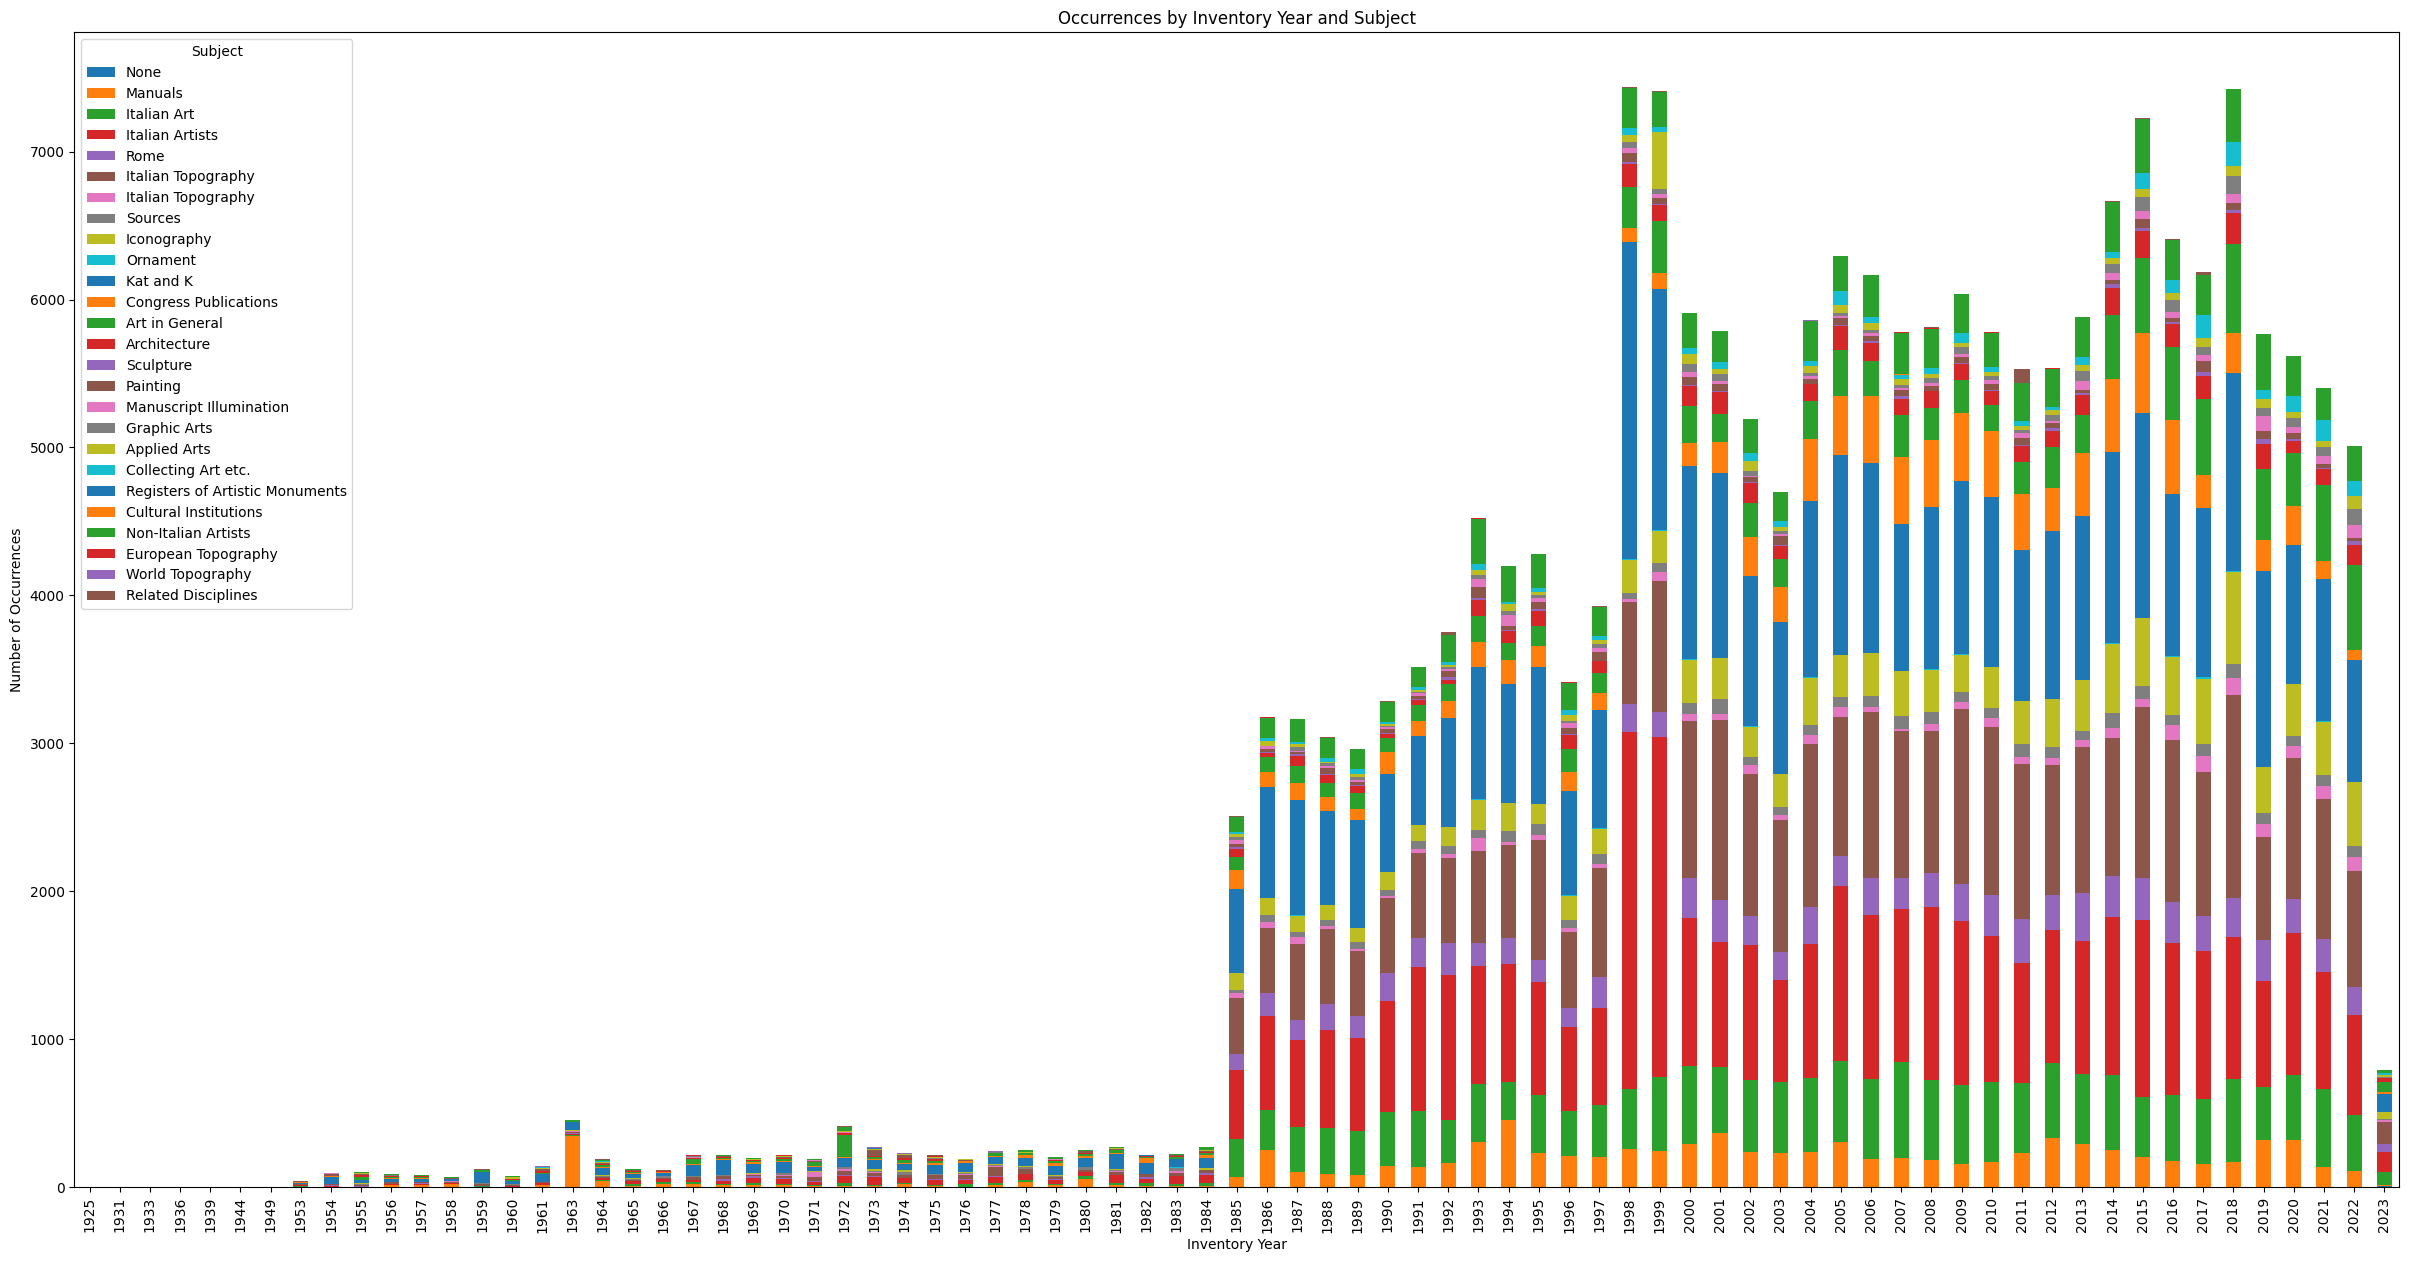

In [10]:
# Group the DataFrame by inventory year and category and count the occurrences

df_freihand['Level1'] = df_freihand.signature.str[0]
year_counts = df_freihand.groupby(['inventory_year', 'Level1']).size().unstack()

# Plot the year_counts as a bar plot
ax = year_counts.plot(kind='bar', stacked=True, figsize=(30, 15))
plt.xlabel('Inventory Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year and Subject')
plt.legend(title='Subject')

# Set the legend labels using the category_dict
handles, labels = ax.get_legend_handles_labels()
new_labels = [subject_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Subject')

# Set the x-tick labels to be integers
ax.set_xticklabels(year_counts.index.astype(int))

plt.show()

# TODO small multiples of signatures, by language, 

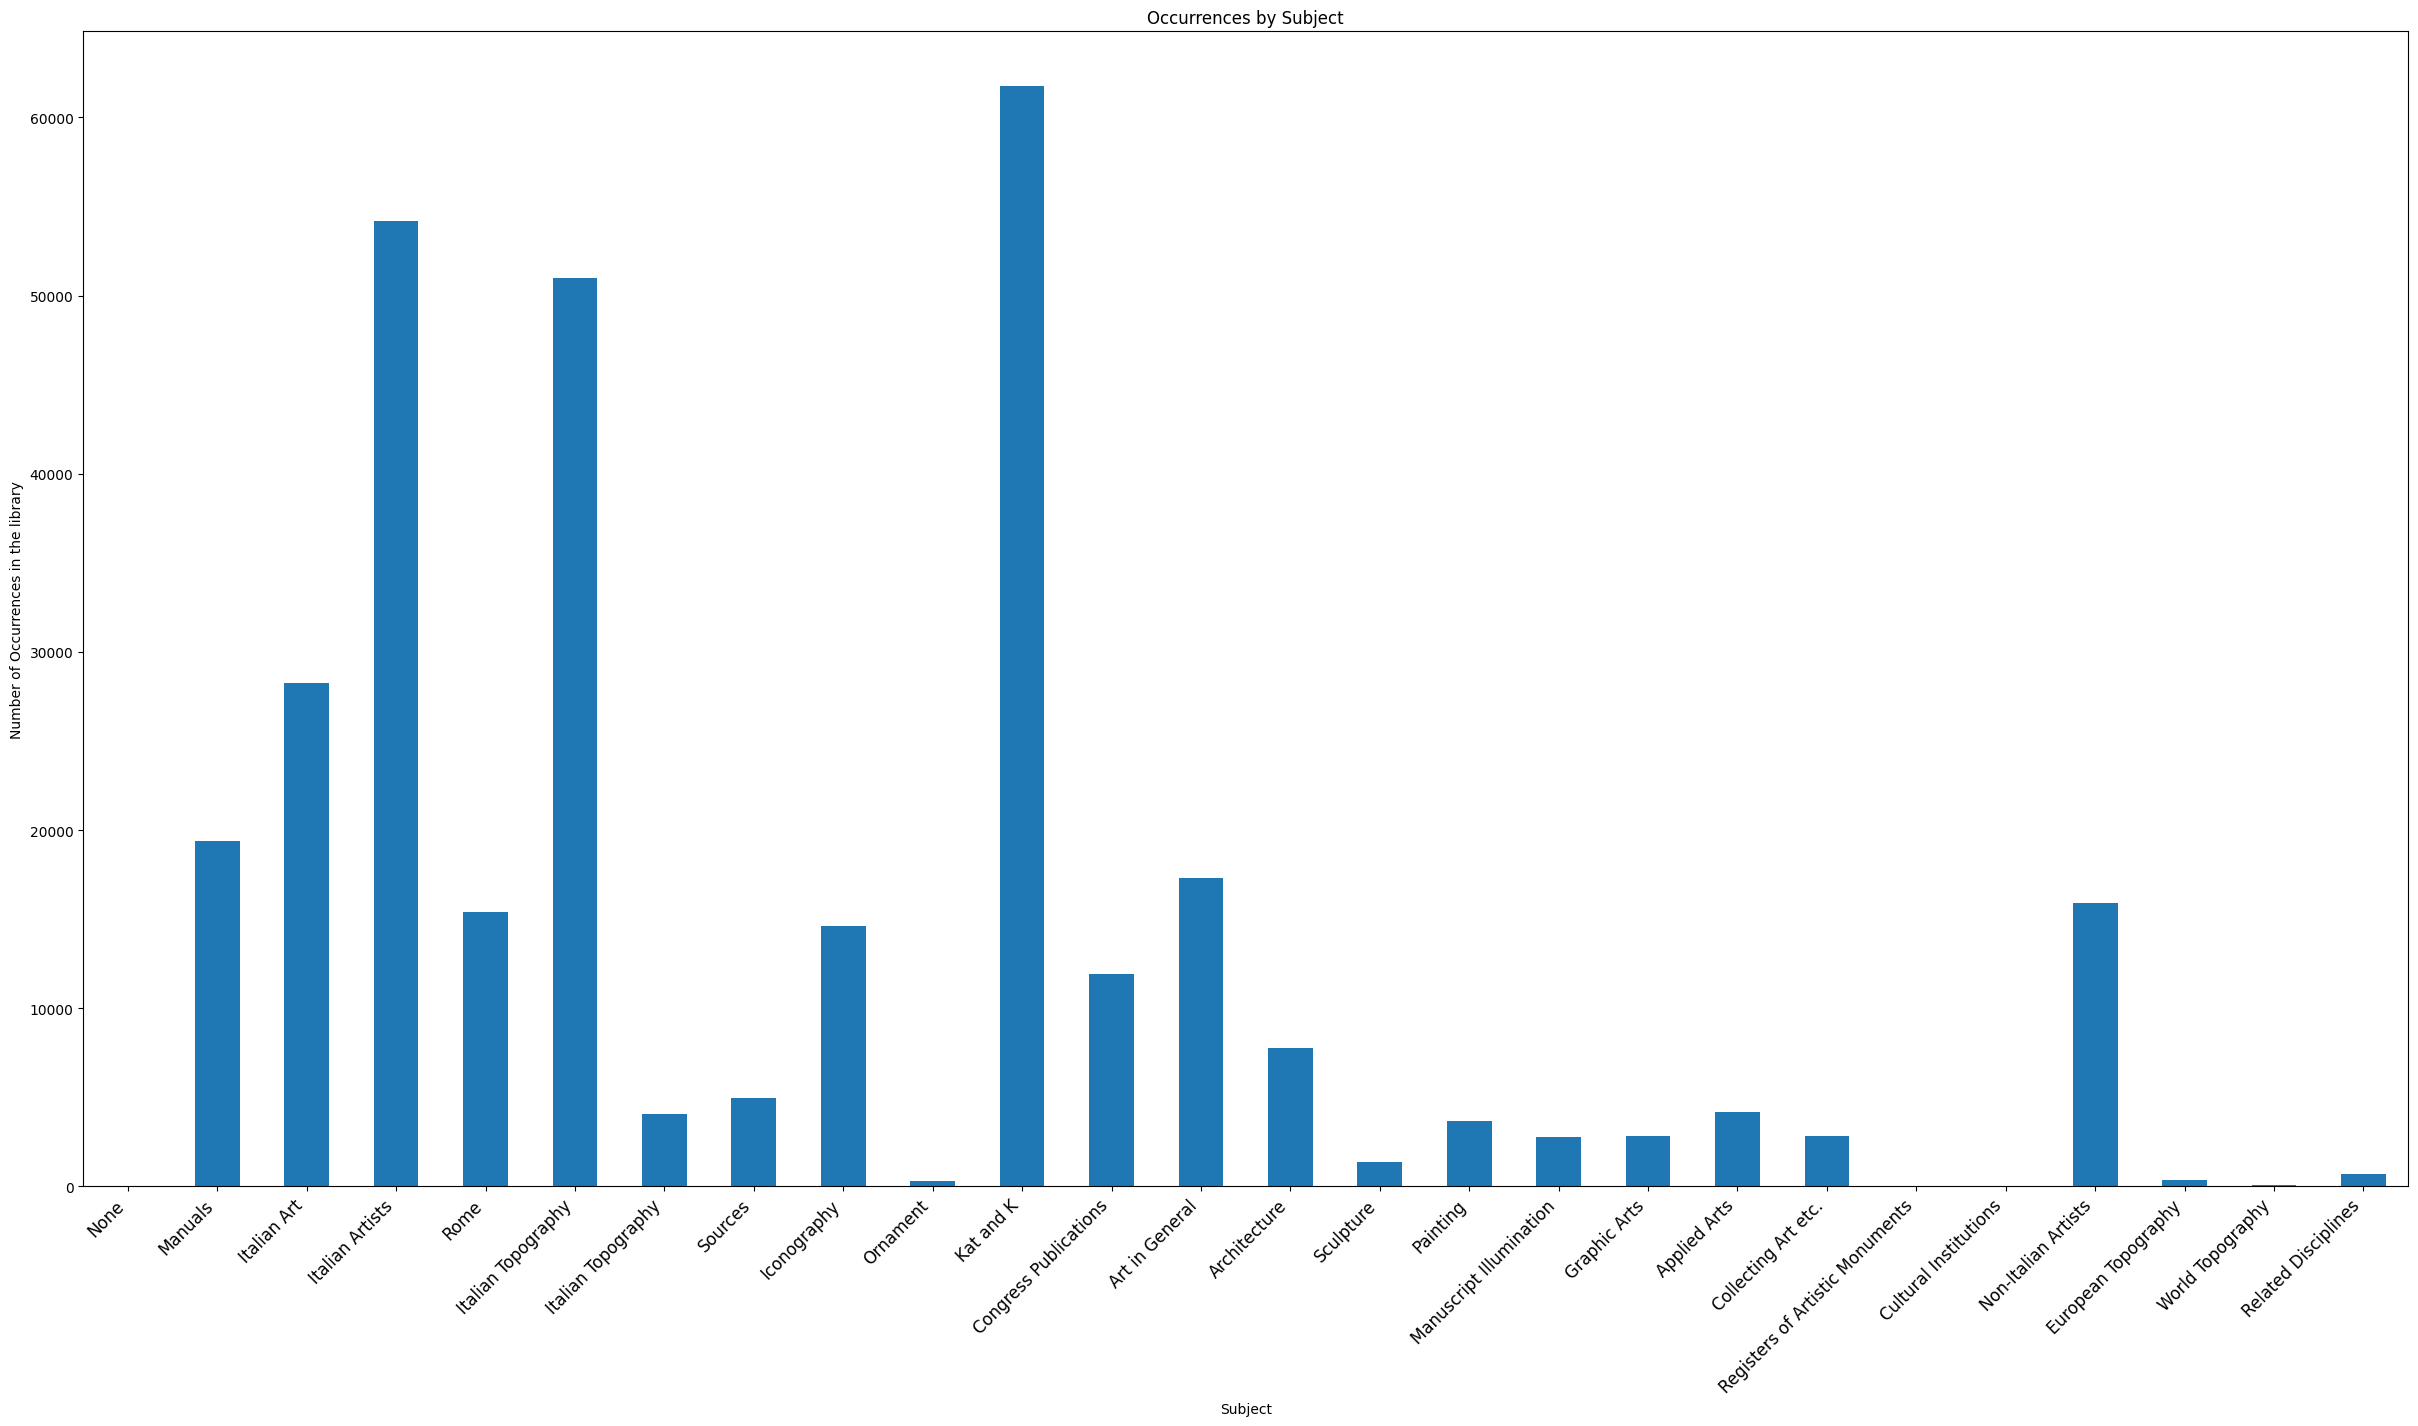

In [11]:
sig_counts = df_freihand.groupby('Level1').size()

sig_counts.index = sig_counts.index.map(subject_dict)
# Plot the year_counts as a bar plot
ax = sig_counts.plot(kind='bar', figsize=(30, 15))
plt.xlabel('Subject')
plt.ylabel('Number of Occurrences in the library')
plt.title('Occurrences by Subject')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()




# Unreadable signatures 

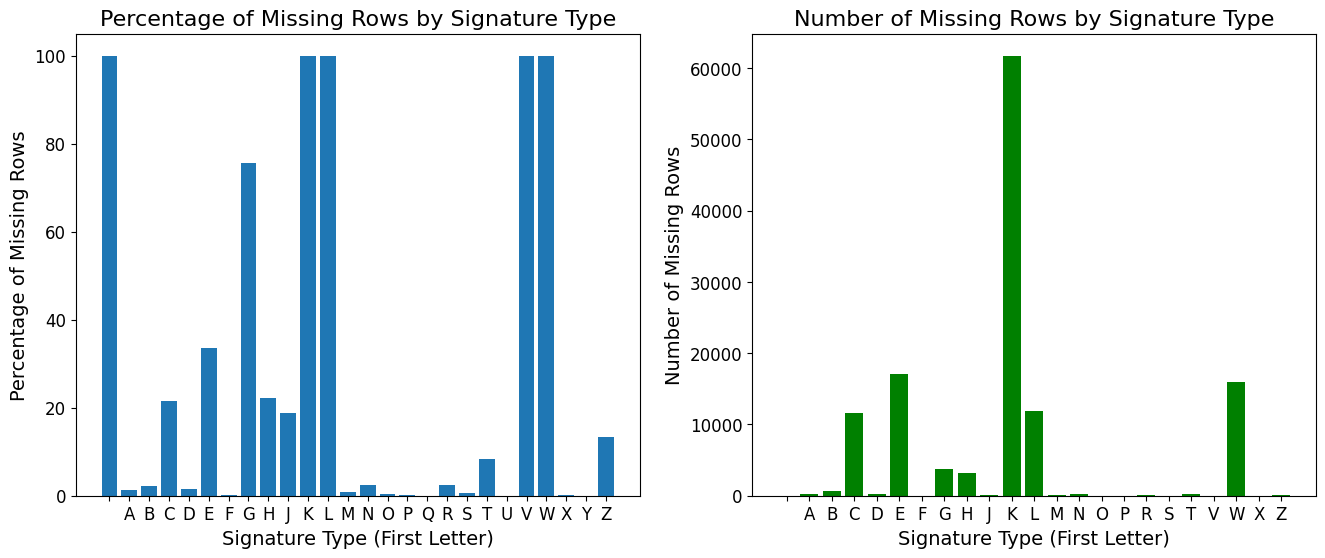

In [12]:
merged_df = df_freihand.merge(df, on='signature', how='left', indicator=True)
missing_rows = merged_df[merged_df['_merge'] == 'left_only']

# Count the number of rows in each group
total_counts = df_freihand.groupby(df_freihand['Level1']).size()
missing_counts = missing_rows.groupby(missing_rows['Level1_x']).size()

missing_percentages = (missing_counts / total_counts) * 100



# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(missing_percentages.index, missing_percentages.values)
ax1.set_title('Percentage of Missing Rows by Signature Type', fontsize=16)
ax1.set_xlabel('Signature Type (First Letter)', fontsize=14)
ax1.set_ylabel('Percentage of Missing Rows', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.bar(missing_counts.index, missing_counts.values, color='green')
ax2.set_title('Number of Missing Rows by Signature Type', fontsize=16)
ax2.set_xlabel('Signature Type (First Letter)', fontsize=14)
ax2.set_ylabel('Number of Missing Rows', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [13]:
missing_counts.sum()

127311